Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Yanjun Zhang"


---

## External libraries: numpy

In [2]:
import numpy as np
import numpy.testing as npt
import matplotlib.pyplot as plt

### Numpy

Complete the functions so that the required functionality is obtained


**1. Replace negative numbers in an array with zeros**

Here we expect the following behaviour: whereever an element is negative in the input array, the output array has those elements replaced with zeros

    >>> set_negative_to_zero([1, 2, -3, 4, 5])
    array([1, 2, 0, 4, 5])

Hint, lookup the documentation for [numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html)


In [3]:
def set_negative_to_zero(a):
    # YOUR CODE HERE
    ################
    return np.where(a<0,0,a)

In [4]:
a = np.array([1, 2, -3, 4, -5])
npt.assert_equal(set_negative_to_zero(a), [1, 2, 0, 4, 0])

**2. Create a copy of an array with all negative numbers removed**

The output array will have a smaller length here than the original

    >>> drop_negative_numbers(np.array([1, 2, -3, 4, -5]))
    array([1, 2, 4])

Hint: use the original array in a logical expression gives a boolean array that can filter your data

In [5]:
def drop_negative_numbers(a):
    # YOUR CODE HERE
    ################
    return a[a >= 0]

In [6]:
a = np.array([1, 2, -3, 4, -5])
b = drop_negative_numbers(a)
npt.assert_equal(b, [1, 2, 4])

**3. Linear regression with numpy**

Consider the optimal mapping of a straight line to a set of points. We have a set of observation points with coordinates $\{x_i, y_i: i=1, n\}$. What are the "best" values of $k$, and $l$ that map the dots on a straigt line?

$$ y = kx + l $$

The error between prediction and observation of $y$

$$\epsilon_i = kx_i + l - y_i$$

Minimize the total error (based on least squares)

$$ L = \sum_i \epsilon_i^2$$

with respect to parameters $k, l$

$$
\left\lbrace
\begin{split}
\frac{\partial L}{\partial k} &= 0 = 2\sum_i\epsilon_i x_i = 2\sum_i(kx_i + l- y_i)x_i\\
\frac{\partial L}{\partial l} &= 0 = 2\sum_i\epsilon_i  = 2\sum_i(kx_i + l- y_i)\\
\end{split}
\right.
$$
*i.e.* a system of equations for $k, l$
$$
\left\lbrace\begin{split}
(\sum_i x_i^2)k + (\sum_ix_i)l &=\sum_i x_iy_i\\
(\sum_ix_i)k + (\sum_i 1)l &= \sum_i y_i
\end{split}
\right.
$$

Data in the accompanying file data.txt, have the following distribution

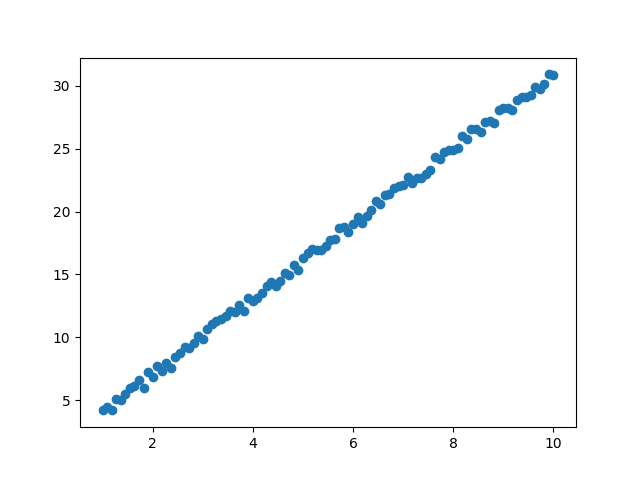



**3.a Read data from file**
Read the data into two numpy arrays, one for each column in the file

In [7]:
#Read points from file

def read_data(filename):
    # YOUR CODE HERE
    ################
    data = np.loadtxt(filename)
    x = data[:,0]
    y = data[:,1]
    return x,y

In [8]:
x, y = read_data('data.txt')
assert len(x) == 100
assert len(y) == 100
assert isinstance(x, np.ndarray)
assert isinstance(y, np.ndarray)

**3.b** 

Use numpy linear algebra to obtain the straight-line parameters

In [9]:
def linear_regression(x, y):
    # YOUR CODE HERE
    ################
    k,l = np.polyfit(x,y,1)
    return k,l
    

In [10]:
def linear_regression(x, y):
    # YOUR CODE HERE
    ################
    A = np.array([[np.sum(x**2),np.sum(x)],[np.sum(x),len(x)]])
    B = np.array([np.sum(x*y),np.sum(y)])
    k,l = np.linalg.solve(A,B)
    
    return k,l

In [11]:
k, l = linear_regression(x, y)
assert round(k, 1) == 3.0
assert round(l, 1) == 1.2

**3.c** Generate a plot with both points (reproducing the plot above) and straight line (with color red) in the same figure. Have the function save the figure to file `linear_regression.png` and finally have the figure and axes objects as return values

In [12]:
def plot_points_and_line(x, y):
    ...
    # YOUR CODE HERE
    ################
    y1 = x*k+l
    fig, ax = plt.subplots()
    plt.plot(x,y1,'r')
    plt.plot(x,y)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    return fig, ax
    fig.savefig('linear_regression.png')

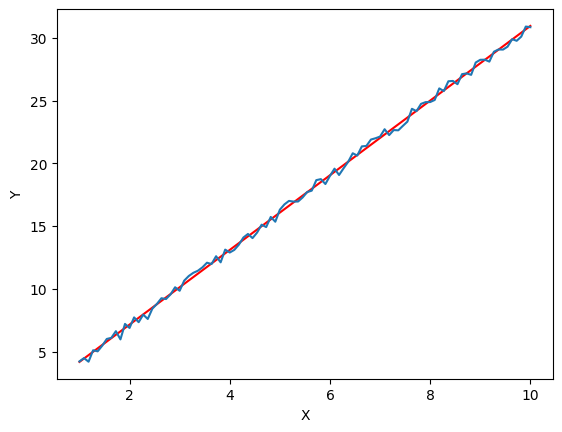

In [13]:
f, a = plot_points_and_line(x, y)
import os
assert os.path.exists('linear_regression.png')
assert f.get_axes()[0] is a

# Here you should se the scatter plot above and also a red straight line connecting the dots